# HOW TO RETRIEVE AND USE VOLCANO DATA

# GNSS data

GNSS data are available through the GeoNet's [Tilde](https://tilde.geonet.org.nz/) service.

## &nbsp;Table of contents
### [1. Basic requirements](#section_1)
### [2. Basic data retrieval](#section_2)
### [2. Basic data graphing](#section_3)

## &nbsp;1. Basic requirements <a id="section_1"></a>

### Import required Python modules/libraries

In [34]:
import json # package to read json code
import requests # package to get data from an API
import pandas as pd # package for data frames
import datetime as dt # package to deal with time
import matplotlib.pyplot as plt #package to do plotting
from io import StringIO # package to work with various I/O

### Set the source URL

In [4]:
base_url = 'https://tilde.geonet.org.nz/'
api_version = 'v4'
endpoint = 'data'


## &nbsp;2. Basic data retrieval <a id="section_2"></a>

We need to set:

- `domain` value which is an overall description of the type of observations, `gnss`;

- `key` which is build of:

  - `station`, where data are collected, `VGMT` station on the south side of Mt Ruapehu,
  - `name`, type of data collected, `displacement`,
  - `sensor_code` is not applicable to the GNSS so should be a `-` value,
  - `method` is the time resolution of the time series, `1d`,
  - `aspect` components of displacement (`up`, `north`, `east` or `-` if we want to get all three components);

- `start_date` and `end_data`  date  values of the query period in the format of `yyyy-mm-dd`.

In [44]:
domain = 'gnss'

station="VGMT"
name="displacement"
sensor_code="-"
method="1d"
aspect="up"

key=f"{station}/{name}/{sensor_code}/{method}/{aspect}"

# We retrieve data for 2024
start_date = "2024-01-01"
end_date = "2024-12-31"

# Build URL
url = f"{base_url}/{api_version}/{endpoint}/{domain}/{key}/{start_date}/{end_date}"

# Download data and build a dataframe 
r = requests.get(url, headers={'Accept':'text/csv'})
up = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')

# Print dataframe
up.head()

,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-01-01 11:59:00+00:00,gnss,VGMT,displacement,nil,1d,up,-0.02011,m,0.00577,m,NaN
2024-01-02 11:59:00+00:00,gnss,VGMT,displacement,nil,1d,up,-0.01228,m,0.00588,m,NaN
2024-01-03 11:59:00+00:00,gnss,VGMT,displacement,nil,1d,up,-0.01573,m,0.01072,m,NaN
2024-01-04 11:59:00+00:00,gnss,VGMT,displacement,nil,1d,up,-0.02005,m,0.00670,m,NaN
2024-01-05 11:59:00+00:00,gnss,VGMT,displacement,nil,1d,up,-0.01527,m,0.00657,m,NaN


**Repeat for `east` and `north` components**

In [39]:
aspect="east"
key=f"{station}/{name}/{sensor_code}/{method}/{aspect}"
url = f"{base_url}/{api_version}/{endpoint}/{domain}/{key}/{start_date}/{end_date}"

r = requests.get(url, headers={'Accept':'text/csv'})
east = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')

In [40]:
aspect="north"
key=f"{station}/{name}/{sensor_code}/{method}/{aspect}"
url = f"{base_url}/{api_version}/{endpoint}/{domain}/{key}/{start_date}/{end_date}"

r = requests.get(url, headers={'Accept':'text/csv'})
north = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')

### Data Summary
By using `up.describe()` we can summarise the returned data as this features generates descriptive statistics from dataframes. We can see the number of values (and errors). All the qc values are currently undefined. By default, we also get to see the mean, standard deviation, minimum, maximum, and some percentile values.

In [41]:
up.describe()

,value,error,qualityControl
count,366.000000,366.000000,0.0
mean,-0.014657,0.008406,NaN
std,0.005403,0.001598,NaN
min,-0.032370,0.005090,NaN
25%,-0.018082,0.007352,NaN
50%,-0.014735,0.008130,NaN
75%,-0.011123,0.009185,NaN
max,0.015620,0.016240,NaN


## &nbsp;3. Basic data graphing <a id="section_3"></a>

### Plot of each component
By using the displacement columns from our `up`, `north`, and `east` dataframes we are able to produce a basic graph of the displacement against time. As GNSS daily solutions come with error values, we graph those as error bars. Please note that displacement value unit as well as error units are meters (`m`). 

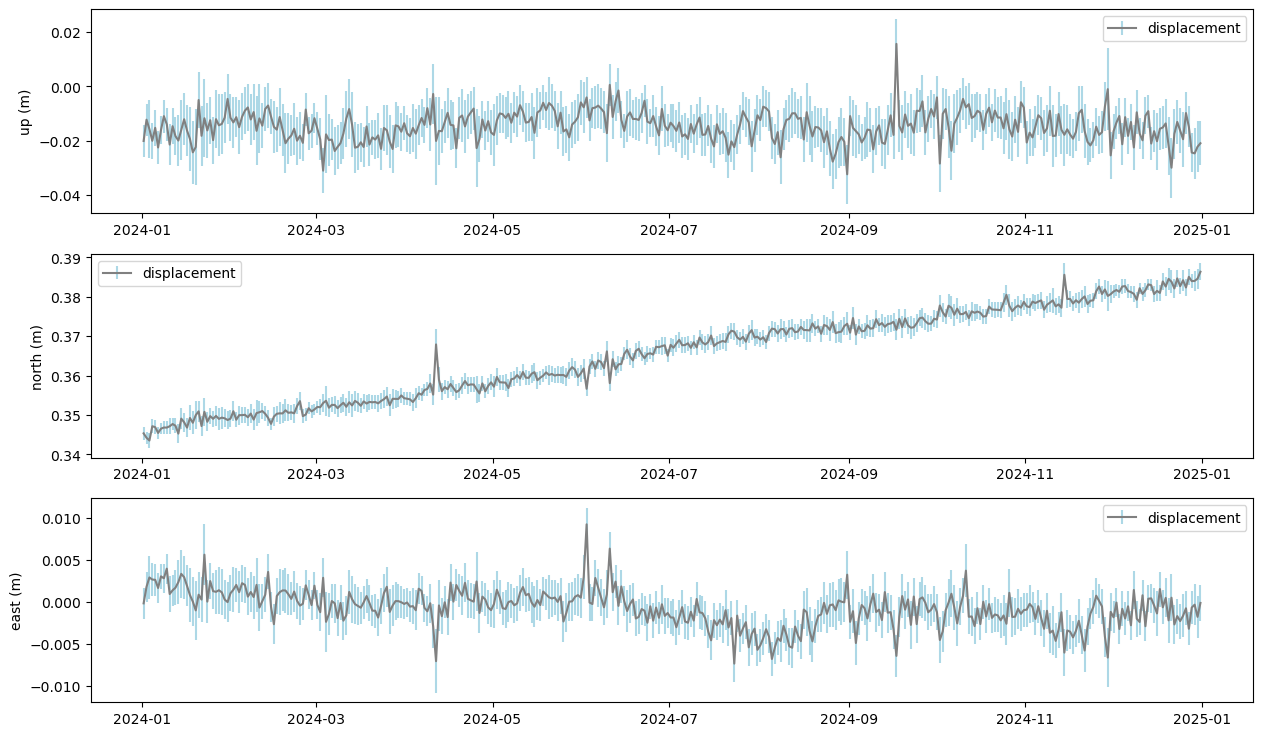

In [43]:
fig,(axu,axn,axe) = plt.subplots(3,1,figsize=(15,9))

axu.errorbar(up.index,
             up.loc[:, 'value'].values,
             yerr=up.loc[:, 'error'].values,
             color='grey', ecolor='lightblue', label='displacement')
axu.set_ylabel('up (m)')
axu.legend()

axn.errorbar(north.index,
             north.loc[:, 'value'].values,
             yerr=north.loc[:, 'error'].values,
             color='grey', ecolor='lightblue', label='displacement') 
axn.set_ylabel('north (m)')
axn.legend()

axe.errorbar(east.index,
             east.loc[:, 'value'].values,
             yerr=east.loc[:, 'error'].values,
             color='grey', ecolor='lightblue', label='displacement')
axe.set_ylabel('east (m)')
axe.legend()